In [ ]:
%pip install -qU langchain-openai

In [ ]:
 pip install -U langchain-mistralai

In [ ]:
pip install langchain_openai

In [ ]:
pip install langchain_mistralai

In [ ]:
import pandas as pd
from langchain_openai import OpenAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
from langchain_mistralai import MistralAIEmbeddings

In [ ]:
import matplotlib.pyplot as plt

**Get API Secret key**

In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


In [ ]:
mistral_embedding = MistralAIEmbeddings(api_key="RqF2XxjUIYihdRD4Hu8r61RoAEkqjHoE")

/usr/local/lib/python3.10/dist-packages/langchain_mistralai/embeddings.py:105: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


**Load Data**

In [ ]:
# Load Quora Question Pairs dataset
data = pd.read_csv('/content/questions.csv')

# Sample preprocessing to keep only relevant columns
data = data[['question1', 'question2', 'is_duplicate']]

In [ ]:
# Select only the first 10 question pairs
data = data.head(10)

In [ ]:
data

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,How can I be a good geologist?,What should I do to be a great geologist?,1
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
data['question1']

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
5    Astrology: I am a Capricorn Sun Cap moon and c...
6                                  Should I buy tiago?
7                       How can I be a good geologist?
8                      When do you use シ instead of し?
9    Motorola (company): Can I hack my Charter Moto...
Name: question1, dtype: object

In [ ]:
data['question2']

0    What is the step by step guide to invest in sh...
1    What would happen if the Indian government sto...
2    How can Internet speed be increased by hacking...
3    Find the remainder when [math]23^{24}[/math] i...
4              Which fish would survive in salt water?
5    I'm a triple Capricorn (Sun, Moon and ascendan...
6    What keeps childern active and far from phone ...
7            What should I do to be a great geologist?
8                When do you use "&" instead of "and"?
9    How do I hack Motorola DCX3400 for free internet?
Name: question2, dtype: object

**Open AI**

In [ ]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

In [ ]:
# Function to get embedding using LangChain
def get_embedding(text, model):
    if model == 'text-embedding-3-small':
        return embeddings.embed_query(text)
    else:
        raise ValueError("Unknown model specified.")

In [ ]:
# Generate embeddings for questions using OpenAI
data['openai_emb_q1'] = data['question1'].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))
data['openai_emb_q2'] = data['question2'].apply(lambda x: get_embedding(x, model='text-embedding-3-small'))

In [ ]:
data['openai_emb_q1']

0    [-0.0020987512543797493, 0.0270865336060524, 0...
1    [-0.009665180929005146, 0.010190058499574661, ...
2    [-0.02165737748146057, -0.010240409523248672, ...
3    [0.0016255807131528854, -0.05770011246204376, ...
4    [0.0366658940911293, 0.02135019563138485, -0.0...
5    [-0.005765771958976984, -0.018585262820124626,...
6    [-0.005711750593036413, -0.023612970486283302,...
7    [0.005276682320982218, 0.004194203298538923, 0...
8    [0.030109459534287453, -0.04055418446660042, 0...
9    [0.0476459376513958, 0.013450254686176777, -0....
Name: openai_emb_q1, dtype: object

In [ ]:
data['openai_emb_q2']

0    [0.001020575873553753, 0.013290978036820889, 0...
1    [-0.029207905754446983, -0.0005261672777123749...
2    [0.03239667788147926, 0.02922770380973816, 0.0...
3    [0.049847107380628586, -0.010537532158195972, ...
4    [0.043602462857961655, 0.020671047270298004, 0...
5    [0.026014558970928192, -0.014319832436740398, ...
6    [0.019075192511081696, 0.05860569328069687, -0...
7    [0.015116829425096512, 0.0010464431252330542, ...
8    [0.02603609673678875, -0.04887866973876953, -0...
9    [0.0013767997734248638, -0.00693125743418932, ...
Name: openai_emb_q2, dtype: object

In [ ]:
# # Print embeddings for testing
# print("OpenAI Embeddings for Question 1:")
# print(data['openai_emb_q1'].tolist())

# print("OpenAI Embeddings for Question 2:")
# print(data['openai_emb_q2'].tolist())

In [ ]:
# Compute cosine similarity for OpenAI embeddings
data['openai_similarity'] = data.apply(lambda row: cosine_similarity([row['openai_emb_q1']], [row['openai_emb_q2']])[0][0], axis=1)

In [ ]:
data

,question1,question2,is_duplicate,openai_emb_q1,openai_emb_q2,openai_similarity
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-0.0020987512543797493, 0.0270865336060524, 0...","[0.001020575873553753, 0.013290978036820889, 0...",0.929087
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[-0.009665180929005146, 0.010190058499574661, ...","[-0.029207905754446983, -0.0005261672777123749...",0.624028
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.02165737748146057, -0.010240409523248672, ...","[0.03239667788147926, 0.02922770380973816, 0.0...",0.571874
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0.0016255807131528854, -0.05770011246204376, ...","[0.049847107380628586, -0.010537532158195972, ...",0.074306
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0.0366658940911293, 0.02135019563138485, -0.0...","[0.043602462857961655, 0.020671047270298004, 0...",0.269915
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[-0.005765771958976984, -0.018585262820124626,...","[0.026014558970928192, -0.014319832436740398, ...",0.821463
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[-0.005711750593036413, -0.023612970486283302,...","[0.019075192511081696, 0.05860569328069687, -0...",0.065370
7,How can I be a good geologist?,What should I do to be a great geologist?,1,"[0.005276682320982218, 0.004194203298538923, 0...","[0.015116829425096512, 0.0010464431252330542, ...",0.915295
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[0.030109459534287453, -0.04055418446660042, 0...","[0.02603609673678875, -0.04887866973876953, -0...",0.408815
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[0.0476459376513958, 0.013450254686176777, -0....","[0.0013767997734248638, -0.00693125743418932, ...",0.809771


In [ ]:
data

,question1,question2,is_duplicate,openai_emb_q1,openai_emb_q2,openai_similarity,mistral_emb_q1
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-0.0020987512543797493, 0.0270865336060524, 0...","[0.001020575873553753, 0.013290978036820889, 0...",0.929087,"[-0.018035888671875, 0.040069580078125, 0.0380..."
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[-0.009665180929005146, 0.010190058499574661, ...","[-0.029207905754446983, -0.0005261672777123749...",0.624028,"[-0.0307769775390625, -0.0018453598022460938, ..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.02165737748146057, -0.010240409523248672, ...","[0.03239667788147926, 0.02922770380973816, 0.0...",0.571874,"[-0.046417236328125, 0.0364990234375, 0.024810..."
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0.0016255807131528854, -0.05770011246204376, ...","[0.049847107380628586, -0.010537532158195972, ...",0.074306,"[-0.031585693359375, 0.0282135009765625, 0.014..."
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0.0366658940911293, 0.02135019563138485, -0.0...","[0.043602462857961655, 0.020671047270298004, 0...",0.269915,"[-0.00534820556640625, 0.0233917236328125, 0.0..."
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[-0.005765771958976984, -0.018585262820124626,...","[0.026014558970928192, -0.014319832436740398, ...",0.821463,"[-0.02978515625, -0.00099945068359375, 0.05551..."
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[-0.005711750593036413, -0.023612970486283302,...","[0.019075192511081696, 0.05860569328069687, -0...",0.065370,"[-0.044769287109375, 0.0156402587890625, 0.030..."
7,How can I be a good geologist?,What should I do to be a great geologist?,1,"[0.005276682320982218, 0.004194203298538923, 0...","[0.015116829425096512, 0.0010464431252330542, ...",0.915295,"[-0.0272216796875, 0.058502197265625, 0.039184..."
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[0.030109459534287453, -0.04055418446660042, 0...","[0.02603609673678875, -0.04887866973876953, -0...",0.408815,"[-0.00768280029296875, 0.04473876953125, 0.050..."
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[0.0476459376513958, 0.013450254686176777, -0....","[0.0013767997734248638, -0.00693125743418932, ...",0.809771,"[-0.005992889404296875, 0.0175018310546875, -0..."


In [ ]:
X_openai = data[['openai_similarity']]
y = data['is_duplicate']

In [ ]:
# Train classifier for OpenAI embeddings
clf_openai = LogisticRegression()
clf_openai.fit(X_openai, y)

LogisticRegression()

In [ ]:
# Predictions
y_pred_openai = clf_openai.predict(X_openai)

**Performance Metrics for OpenAI embeddings**

In [ ]:
# Performance Metrics for OpenAI embeddings
openai_metrics = {
    'accuracy': accuracy_score(y, y_pred_openai),
    'f1_score': f1_score(y, y_pred_openai),
    'precision': precision_score(y, y_pred_openai),
    'recall': recall_score(y, y_pred_openai)
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Display metrics
print("OpenAI Metrics:", openai_metrics)

OpenAI Metrics: {'accuracy': 0.8, 'f1_score': 0.0, 'precision': 0.0, 'recall': 0.0}


**Mistral LangChain**

In [ ]:
mistral_embedding.model = "mistral-embed"  # or your preferred model if available

In [ ]:
# Function to get embedding using LangChain
def get_embedding_mistral(text, model):
    if model == 'mistral-embed':
        response = mistral_embedding.embed_query(text)
        return response
    else:
        raise ValueError("Unknown model specified.")

In [ ]:
# Generate embeddings for questions using Mistral
data['mistral_emb_q1'] = data['question1'].apply(lambda x: get_embedding_mistral(x, model='mistral-embed'))

In [ ]:
data

,question1,question2,is_duplicate,openai_emb_q1,openai_emb_q2,openai_similarity,mistral_emb_q1
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-0.0020987512543797493, 0.0270865336060524, 0...","[0.001020575873553753, 0.013290978036820889, 0...",0.929087,"[-0.018035888671875, 0.040069580078125, 0.0380..."
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[-0.009665180929005146, 0.010190058499574661, ...","[-0.029207905754446983, -0.0005261672777123749...",0.624028,"[-0.0307769775390625, -0.0018453598022460938, ..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.02165737748146057, -0.010240409523248672, ...","[0.03239667788147926, 0.02922770380973816, 0.0...",0.571874,"[-0.046417236328125, 0.0364990234375, 0.024810..."
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0.0016255807131528854, -0.05770011246204376, ...","[0.049847107380628586, -0.010537532158195972, ...",0.074306,"[-0.031585693359375, 0.0282135009765625, 0.014..."
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0.0366658940911293, 0.02135019563138485, -0.0...","[0.043602462857961655, 0.020671047270298004, 0...",0.269915,"[-0.00534820556640625, 0.0233917236328125, 0.0..."
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[-0.005765771958976984, -0.018585262820124626,...","[0.026014558970928192, -0.014319832436740398, ...",0.821463,"[-0.02978515625, -0.00099945068359375, 0.05551..."
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[-0.005711750593036413, -0.023612970486283302,...","[0.019075192511081696, 0.05860569328069687, -0...",0.065370,"[-0.044769287109375, 0.0156402587890625, 0.030..."
7,How can I be a good geologist?,What should I do to be a great geologist?,1,"[0.005276682320982218, 0.004194203298538923, 0...","[0.015116829425096512, 0.0010464431252330542, ...",0.915295,"[-0.0272216796875, 0.058502197265625, 0.039184..."
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[0.030109459534287453, -0.04055418446660042, 0...","[0.02603609673678875, -0.04887866973876953, -0...",0.408815,"[-0.00768280029296875, 0.04473876953125, 0.050..."
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[0.0476459376513958, 0.013450254686176777, -0....","[0.0013767997734248638, -0.00693125743418932, ...",0.809771,"[-0.005992889404296875, 0.0175018310546875, -0..."


In [ ]:
data['mistral_emb_q2'] = data['question2'].apply(lambda x: get_embedding_mistral(x, model='mistral-embed'))

In [ ]:
data['mistral_emb_q1']

0    [-0.018035888671875, 0.040069580078125, 0.0380...
1    [-0.0307769775390625, -0.0018453598022460938, ...
2    [-0.046417236328125, 0.0364990234375, 0.024810...
3    [-0.031585693359375, 0.0282135009765625, 0.014...
4    [-0.00534820556640625, 0.0233917236328125, 0.0...
5    [-0.02978515625, -0.00099945068359375, 0.05551...
6    [-0.044769287109375, 0.0156402587890625, 0.030...
7    [-0.0272216796875, 0.058502197265625, 0.039184...
8    [-0.00768280029296875, 0.04473876953125, 0.050...
9    [-0.005992889404296875, 0.0175018310546875, -0...
Name: mistral_emb_q1, dtype: object

In [ ]:
data['mistral_emb_q2']

0    [-0.0238189697265625, 0.045379638671875, 0.039...
1    [0.0028438568115234375, -0.0006852149963378906...
2    [0.00681304931640625, 0.027435302734375, 0.032...
3    [-0.0148468017578125, 0.050506591796875, 0.049...
4    [0.0021343231201171875, 0.0198516845703125, 0....
5    [-0.0194244384765625, 0.0106353759765625, 0.04...
6    [-0.0041656494140625, 0.034637451171875, -0.00...
7    [-0.02752685546875, 0.0670166015625, 0.0231781...
8    [-0.0078582763671875, 0.042388916015625, 0.050...
9    [0.0119171142578125, 0.0083770751953125, 0.009...
Name: mistral_emb_q2, dtype: object

In [ ]:
data

,question1,question2,is_duplicate,openai_emb_q1,openai_emb_q2,openai_similarity,mistral_emb_q1,mistral_emb_q2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-0.0020987512543797493, 0.0270865336060524, 0...","[0.001020575873553753, 0.013290978036820889, 0...",0.929087,"[-0.018035888671875, 0.040069580078125, 0.0380...","[-0.0238189697265625, 0.045379638671875, 0.039..."
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[-0.009665180929005146, 0.010190058499574661, ...","[-0.029207905754446983, -0.0005261672777123749...",0.624028,"[-0.0307769775390625, -0.0018453598022460938, ...","[0.0028438568115234375, -0.0006852149963378906..."
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.02165737748146057, -0.010240409523248672, ...","[0.03239667788147926, 0.02922770380973816, 0.0...",0.571874,"[-0.046417236328125, 0.0364990234375, 0.024810...","[0.00681304931640625, 0.027435302734375, 0.032..."
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0.0016255807131528854, -0.05770011246204376, ...","[0.049847107380628586, -0.010537532158195972, ...",0.074306,"[-0.031585693359375, 0.0282135009765625, 0.014...","[-0.0148468017578125, 0.050506591796875, 0.049..."
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0.0366658940911293, 0.02135019563138485, -0.0...","[0.043602462857961655, 0.020671047270298004, 0...",0.269915,"[-0.00534820556640625, 0.0233917236328125, 0.0...","[0.0021343231201171875, 0.0198516845703125, 0...."
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[-0.005765771958976984, -0.018585262820124626,...","[0.026014558970928192, -0.014319832436740398, ...",0.821463,"[-0.02978515625, -0.00099945068359375, 0.05551...","[-0.0194244384765625, 0.0106353759765625, 0.04..."
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[-0.005711750593036413, -0.023612970486283302,...","[0.019075192511081696, 0.05860569328069687, -0...",0.065370,"[-0.044769287109375, 0.0156402587890625, 0.030...","[-0.0041656494140625, 0.034637451171875, -0.00..."
7,How can I be a good geologist?,What should I do to be a great geologist?,1,"[0.005276682320982218, 0.004194203298538923, 0...","[0.015116829425096512, 0.0010464431252330542, ...",0.915295,"[-0.0272216796875, 0.058502197265625, 0.039184...","[-0.02752685546875, 0.0670166015625, 0.0231781..."
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[0.030109459534287453, -0.04055418446660042, 0...","[0.02603609673678875, -0.04887866973876953, -0...",0.408815,"[-0.00768280029296875, 0.04473876953125, 0.050...","[-0.0078582763671875, 0.042388916015625, 0.050..."
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[0.0476459376513958, 0.013450254686176777, -0....","[0.0013767997734248638, -0.00693125743418932, ...",0.809771,"[-0.005992889404296875, 0.0175018310546875, -0...","[0.0119171142578125, 0.0083770751953125, 0.009..."


In [ ]:
# Compute cosine similarity for Mistral embeddings
data['mistral_similarity'] = data.apply(lambda row: cosine_similarity([row['mistral_emb_q1']], [row['mistral_emb_q2']])[0][0], axis=1)

In [ ]:
data

,question1,question2,is_duplicate,openai_emb_q1,openai_emb_q2,openai_similarity,mistral_emb_q1,mistral_emb_q2,mistral_similarity
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[-0.0020987512543797493, 0.0270865336060524, 0...","[0.001020575873553753, 0.013290978036820889, 0...",0.929087,"[-0.018035888671875, 0.040069580078125, 0.0380...","[-0.0238189697265625, 0.045379638671875, 0.039...",0.980965
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[-0.009665180929005146, 0.010190058499574661, ...","[-0.029207905754446983, -0.0005261672777123749...",0.624028,"[-0.0307769775390625, -0.0018453598022460938, ...","[0.0028438568115234375, -0.0006852149963378906...",0.857052
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.02165737748146057, -0.010240409523248672, ...","[0.03239667788147926, 0.02922770380973816, 0.0...",0.571874,"[-0.046417236328125, 0.0364990234375, 0.024810...","[0.00681304931640625, 0.027435302734375, 0.032...",0.819855
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[0.0016255807131528854, -0.05770011246204376, ...","[0.049847107380628586, -0.010537532158195972, ...",0.074306,"[-0.031585693359375, 0.0282135009765625, 0.014...","[-0.0148468017578125, 0.050506591796875, 0.049...",0.608815
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[0.0366658940911293, 0.02135019563138485, -0.0...","[0.043602462857961655, 0.020671047270298004, 0...",0.269915,"[-0.00534820556640625, 0.0233917236328125, 0.0...","[0.0021343231201171875, 0.0198516845703125, 0....",0.752203
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,"[-0.005765771958976984, -0.018585262820124626,...","[0.026014558970928192, -0.014319832436740398, ...",0.821463,"[-0.02978515625, -0.00099945068359375, 0.05551...","[-0.0194244384765625, 0.0106353759765625, 0.04...",0.931559
6,Should I buy tiago?,What keeps childern active and far from phone ...,0,"[-0.005711750593036413, -0.023612970486283302,...","[0.019075192511081696, 0.05860569328069687, -0...",0.065370,"[-0.044769287109375, 0.0156402587890625, 0.030...","[-0.0041656494140625, 0.034637451171875, -0.00...",0.681402
7,How can I be a good geologist?,What should I do to be a great geologist?,1,"[0.005276682320982218, 0.004194203298538923, 0...","[0.015116829425096512, 0.0010464431252330542, ...",0.915295,"[-0.0272216796875, 0.058502197265625, 0.039184...","[-0.02752685546875, 0.0670166015625, 0.0231781...",0.943635
8,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,"[0.030109459534287453, -0.04055418446660042, 0...","[0.02603609673678875, -0.04887866973876953, -0...",0.408815,"[-0.00768280029296875, 0.04473876953125, 0.050...","[-0.0078582763671875, 0.042388916015625, 0.050...",0.784663
9,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,"[0.0476459376513958, 0.013450254686176777, -0....","[0.0013767997734248638, -0.00693125743418932, ...",0.809771,"[-0.005992889404296875, 0.0175018310546875, -0...","[0.0119171142578125, 0.0083770751953125, 0.009...",0.844625


In [ ]:
# Since we only have 10 samples, we'll use them all for training and testing
X_mistral = data[['mistral_similarity']]

In [ ]:
y = data['is_duplicate']

In [ ]:
# Train classifier for Mistral AI embeddings
clf_mistral = LogisticRegression()
clf_mistral.fit(X_mistral, y)

LogisticRegression()

In [ ]:
# Predictions
y_pred_mistral = clf_mistral.predict(X_mistral)

**Performance Metrics for Mistral embeddings**

In [ ]:
# Performance Metrics for Mistral embeddings
mistral_metrics = {
    'accuracy': accuracy_score(y, y_pred_mistral),
    'f1_score': f1_score(y, y_pred_mistral),
    'precision': precision_score(y, y_pred_mistral),
    'recall': recall_score(y, y_pred_mistral)
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Display metrics
print("Mistral Metrics:", mistral_metrics)

Mistral Metrics: {'accuracy': 0.8, 'f1_score': 0.0, 'precision': 0.0, 'recall': 0.0}


**Comparison Plot**

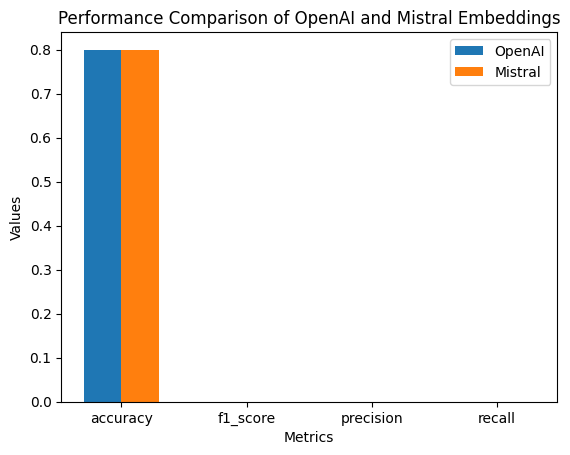

In [ ]:
# Prepare data for plotting
metrics = ['accuracy', 'f1_score', 'precision', 'recall']
openai_values = [openai_metrics[metric] for metric in metrics]
mistral_values = [mistral_metrics[metric] for metric in metrics]

# Create bar plot
x = range(len(metrics))
width = 0.3

fig, ax = plt.subplots()
ax.bar(x, openai_values, width, label='OpenAI')
ax.bar([p + width for p in x], mistral_values, width, label='Mistral')

# Set axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Performance Comparison of OpenAI and Mistral Embeddings')
ax.set_xticks([p + width/2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Display the plot
plt.show()

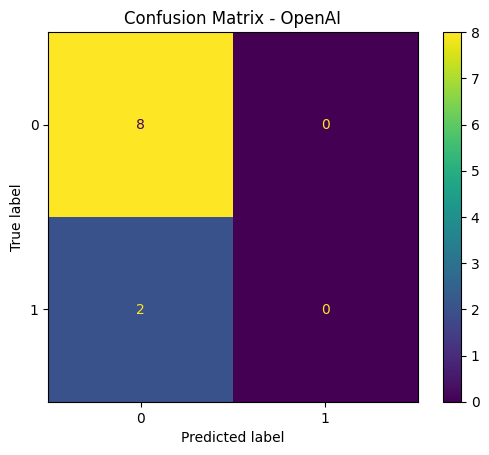

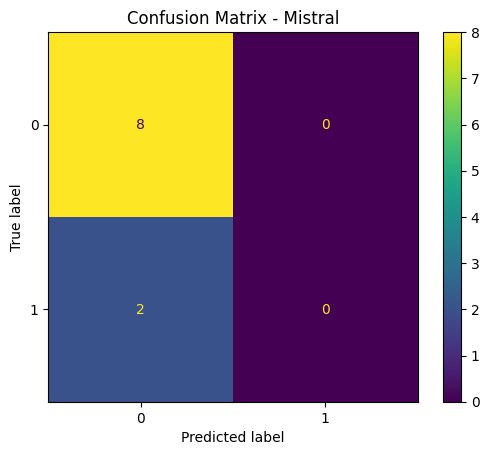

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for OpenAI
cm_openai = confusion_matrix(y, y_pred_openai)
disp_openai = ConfusionMatrixDisplay(confusion_matrix=cm_openai)
disp_openai.plot()
plt.title('Confusion Matrix - OpenAI')
plt.show()

# Confusion matrix for Mistral
cm_mistral = confusion_matrix(y, y_pred_mistral)
disp_mistral = ConfusionMatrixDisplay(confusion_matrix=cm_mistral)
disp_mistral.plot()
plt.title('Confusion Matrix - Mistral')
plt.show()

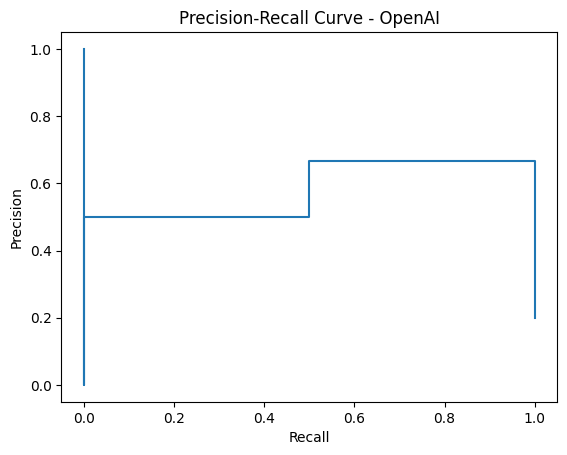

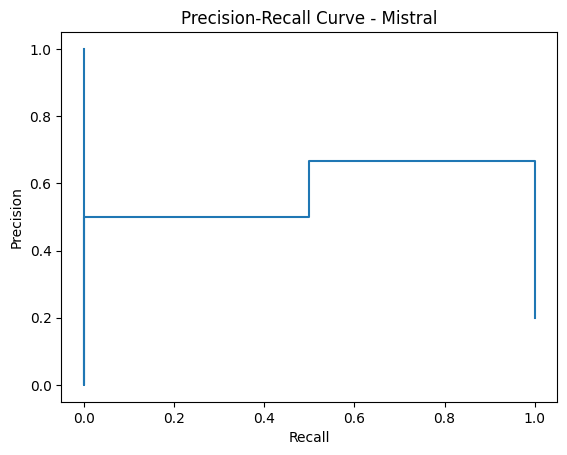

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# Precision-Recall curve for OpenAI
precision_openai, recall_openai, _ = precision_recall_curve(y, clf_openai.decision_function(X_openai))
disp_pr_openai = PrecisionRecallDisplay(precision=precision_openai, recall=recall_openai)
disp_pr_openai.plot()
plt.title('Precision-Recall Curve - OpenAI')
plt.show()

# Precision-Recall curve for Mistral
precision_mistral, recall_mistral, _ = precision_recall_curve(y, clf_mistral.decision_function(X_mistral))
disp_pr_mistral = PrecisionRecallDisplay(precision=precision_mistral, recall=recall_mistral)
disp_pr_mistral.plot()
plt.title('Precision-Recall Curve - Mistral')
plt.show()


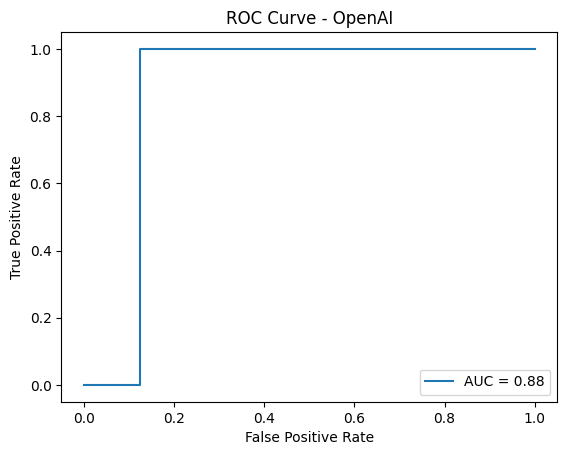

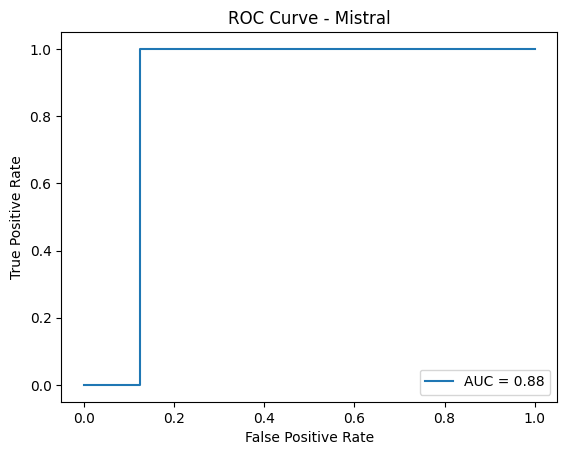

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

# ROC curve for OpenAI
fpr_openai, tpr_openai, _ = roc_curve(y, clf_openai.decision_function(X_openai))
roc_auc_openai = roc_auc_score(y, clf_openai.decision_function(X_openai))
disp_roc_openai = RocCurveDisplay(fpr=fpr_openai, tpr=tpr_openai, roc_auc=roc_auc_openai)
disp_roc_openai.plot()
plt.title('ROC Curve - OpenAI')
plt.show()

# ROC curve for Mistral
fpr_mistral, tpr_mistral, _ = roc_curve(y, clf_mistral.decision_function(X_mistral))
roc_auc_mistral = roc_auc_score(y, clf_mistral.decision_function(X_mistral))
disp_roc_mistral = RocCurveDisplay(fpr=fpr_mistral, tpr=tpr_mistral, roc_auc=roc_auc_mistral)
disp_roc_mistral.plot()
plt.title('ROC Curve - Mistral')
plt.show()


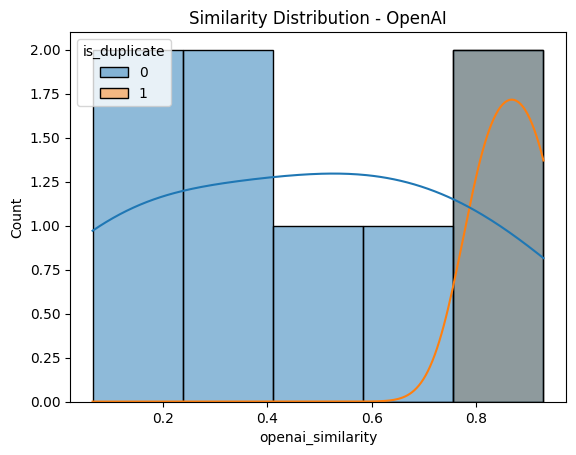

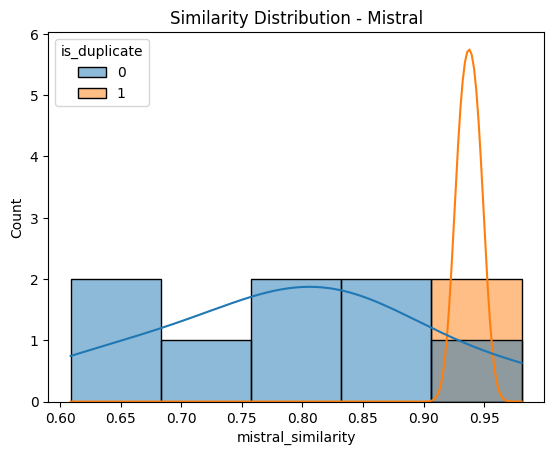

In [ ]:
# Plot similarity distribution for OpenAI embeddings
sns.histplot(data=data, x='openai_similarity', hue='is_duplicate', kde=True)
plt.title('Similarity Distribution - OpenAI')
plt.show()

# Plot similarity distribution for Mistral embeddings
sns.histplot(data=data, x='mistral_similarity', hue='is_duplicate', kde=True)
plt.title('Similarity Distribution - Mistral')
plt.show()

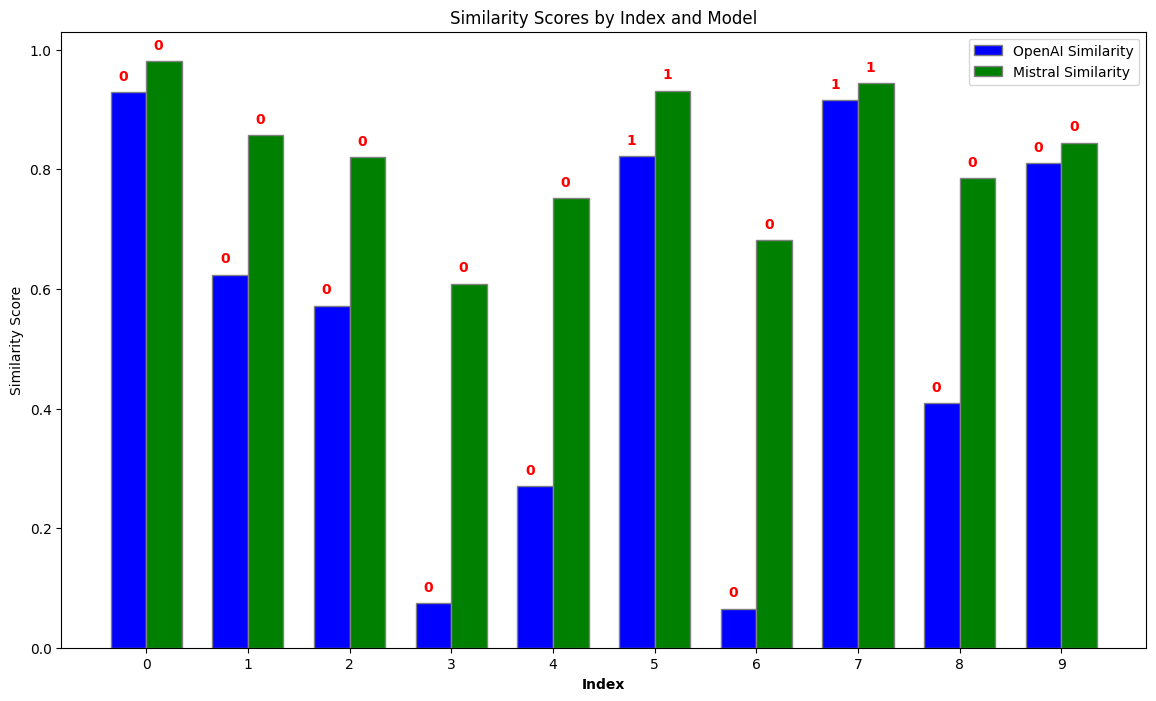

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Adding an index column to the DataFrame for plotting
data = data.reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Set width of bar
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(data))
r2 = [x + bar_width for x in r1]

# Make the plot
ax.bar(r1, data['openai_similarity'], color='b', width=bar_width, edgecolor='grey', label='OpenAI Similarity')
ax.bar(r2, data['mistral_similarity'], color='g', width=bar_width, edgecolor='grey', label='Mistral Similarity')

# Add xticks on the middle of the group bars
ax.set_xlabel('Index', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(data))])
ax.set_xticklabels(data['index'])

# Add labels for is_duplicate
for i in range(len(data)):
    ax.text(r1[i] - 0.1, data['openai_similarity'][i] + 0.02, f"{data['is_duplicate'][i]}", color='red', fontweight='bold')
    ax.text(r2[i] - 0.1, data['mistral_similarity'][i] + 0.02, f"{data['is_duplicate'][i]}", color='red', fontweight='bold')

# Add labels and title
ax.set_ylabel('Similarity Score')
ax.set_title('Similarity Scores by Index and Model')
ax.legend()

# Show the plot
plt.show()

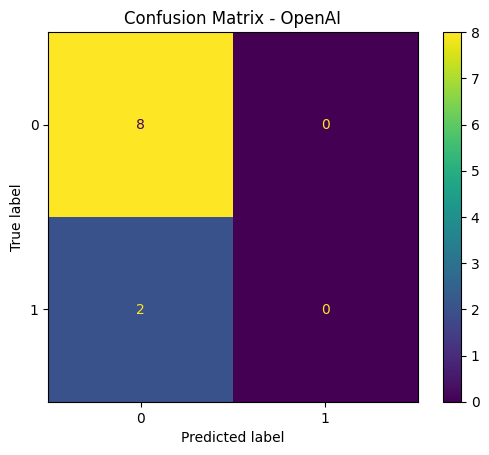

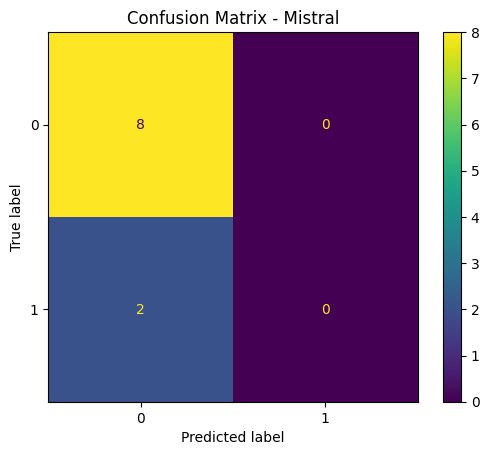

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for OpenAI
cm_openai = confusion_matrix(y, y_pred_openai)
disp_openai = ConfusionMatrixDisplay(confusion_matrix=cm_openai)
disp_openai.plot()
plt.title('Confusion Matrix - OpenAI')
plt.show()

# Confusion matrix for Mistral
cm_mistral = confusion_matrix(y, y_pred_mistral)
disp_mistral = ConfusionMatrixDisplay(confusion_matrix=cm_mistral)
disp_mistral.plot()
plt.title('Confusion Matrix - Mistral')
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.is_duplicate == 0]
df_minority = data[data.is_duplicate == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(data_balanced.is_duplicate.value_counts())


is_duplicate
0    8
1    8
Name: count, dtype: int64


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define a pipeline with feature extraction and model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define hyperparameters to tune
parameters = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1')
grid_search.fit(data_balanced['question1'] + ' ' + data_balanced['question2'], data_balanced['is_duplicate'])

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


{'clf__C': 10, 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 1)}
0.9333333333333332


In [ ]:
import numpy as np

# Get predicted probabilities
y_scores_openai = clf_openai.decision_function(X_openai)
y_scores_mistral = clf_mistral.decision_function(X_mistral)

# Adjust threshold
threshold = 0.5
y_pred_openai_adjusted = np.where(y_scores_openai > threshold, 1, 0)
y_pred_mistral_adjusted = np.where(y_scores_mistral > threshold, 1, 0)

# Evaluate adjusted predictions
from sklearn.metrics import classification_report
print("OpenAI Adjusted Classification Report:")
print(classification_report(y, y_pred_openai_adjusted))

print("Mistral Adjusted Classification Report:")
print(classification_report(y, y_pred_mistral_adjusted))


OpenAI Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10

Mistral Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.is_duplicate == 0]
df_minority = data[data.is_duplicate == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(data_balanced.is_duplicate.value_counts())


is_duplicate
0    8
1    8
Name: count, dtype: int64


In [ ]:
# Define a pipeline with feature extraction and model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define hyperparameters to tune
parameters = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='f1')
X = data_balanced['question1'] + ' ' + data_balanced['question2']
y = data_balanced['is_duplicate']
grid_search.fit(X, y)

# Best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


{'clf__C': 10, 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 1)}
0.9333333333333332


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.8)),
                ('clf', LogisticRegression(C=10))])

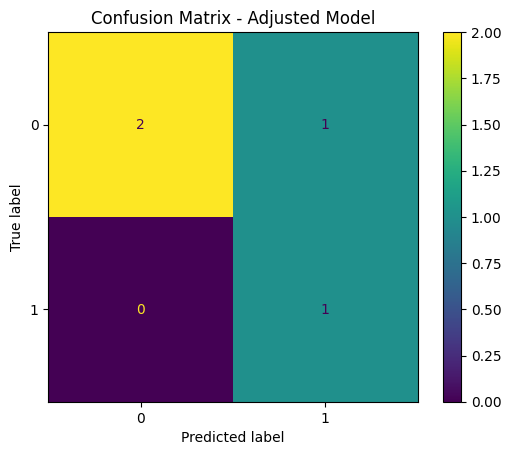

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [ ]:
# Get predicted probabilities
y_scores = best_model.decision_function(X_test)

# Adjust threshold
threshold = 0.5  # You can adjust this threshold to see different results
y_pred_adjusted = np.where(y_scores > threshold, 1, 0)

# Confusion matrix for adjusted predictions
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted)
disp_adjusted.plot()
plt.title('Confusion Matrix - Adjusted Model')
plt.show()

# Print classification report for adjusted predictions
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))
